<a href="https://colab.research.google.com/github/ilham-mukti/Machine-Learning/blob/main/Nyoba_1_SVM_Regresi_%5BData_Carprice%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install jcopml

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.feature_importance import mean_score_decrease
from jcopml.plot import plot_missing_value, plot_confusion_matrix, plot_correlation_matrix
from jcopml.tuning import grid_search_params as gsp
from jcopml.tuning import random_search_params as rsp

sns.set()

In [ ]:
datas = pd.read_csv("/content/carprice.csv", index_col='ID')
datas.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
ID,,,,,,,,,,,,
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [ ]:
def encode_merk(x):
  return x.split()[0]

In [ ]:
datas['Merk'] = datas.Name.apply(encode_merk)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

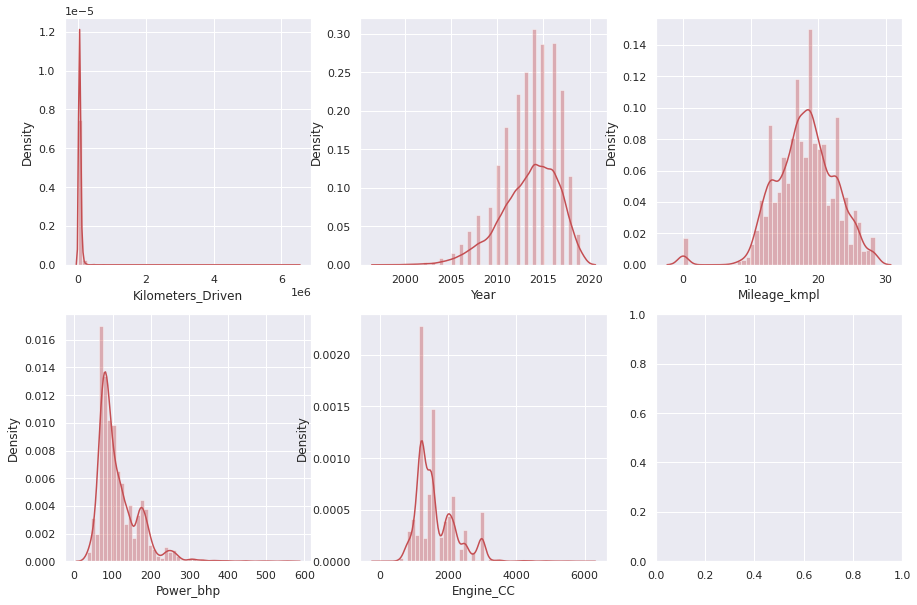

In [ ]:
num_var = ['Kilometers_Driven', 'Year', 'Mileage_kmpl', 'Power_bhp', 'Engine_CC']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for cat, ax in zip(num_var, axes.flatten()):
  sns.distplot(datas[cat][datas.Price > 1], color='r', label=cat, ax=ax)

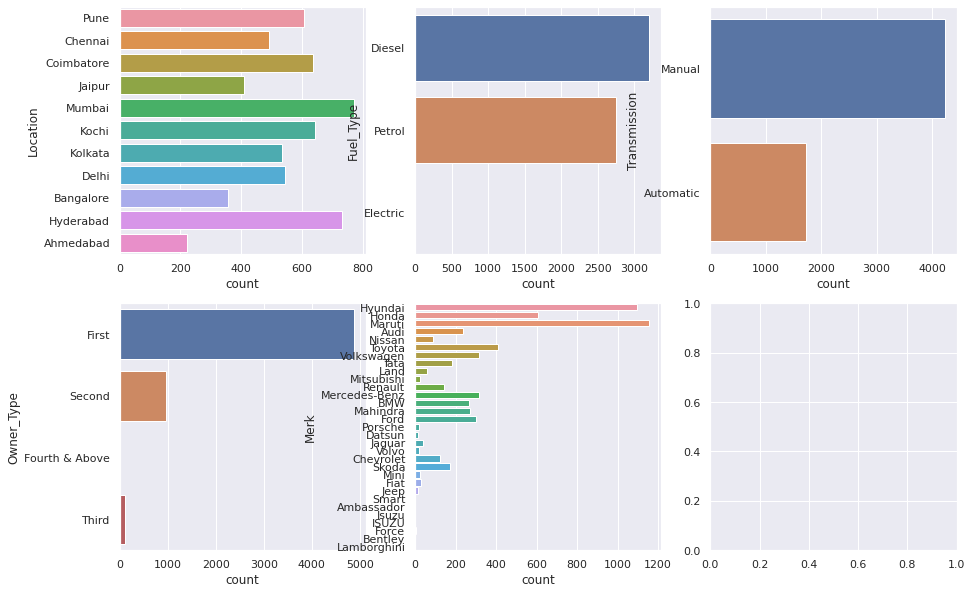

In [ ]:
cat_var = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Merk']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for cat, ax in zip(cat_var, axes.flatten()):
  sns.countplot(y=cat, data=datas, ax=ax)


In [ ]:
X = datas.drop(columns=['Name', 'Price'])
y = datas.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((4762, 11), (1191, 11))

In [ ]:
preprocessor = ColumnTransformer([
    ('categoric', cat_pipe(impute='most_frequent', encoder='onehot'), ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Merk']),
    ('numeric', num_pipe(impute='median', scaling='robust', transform='yeo-johnson'), ['Year', 'Kilometers_Driven', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp',
       'Seats'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])

/usr/local/lib/python3.7/dist-packages/jcopml/pipeline/_pipeline.py:65: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


In [ ]:
param = {
    'algo__gamma': np.logspace(-3, 3, 7),
    'algo__C': np.logspace(-3, 3, 7)
}

model = GridSearchCV(pipeline, param_grid=gsp.svm_params, cv=3, verbose=1)
model.fit(X_train, y_train)

In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test), model.best_params_

(0.937163377586354, 0.8736556902279792, {'algo__C': 100.0, 'algo__gamma': 0.1})